# PyTorch Workflow

Let's explore an example of PyTorch end-to-end workflow

Resources:
- Ground Truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
- Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)" ,
    4: "making predicitons and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [118]:
import torch
from torch import nn  # nn contrains all of PyTorch's building blocks
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning.

- Excel spreadsheet
- Images of any kind
- Videos (YouTube has lots of data)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data  using the linear regression formula

We'll use a linear regression formula to make a stragiht line with *known* **parameters**

In [119]:
# Create known parameters
weight = 0.7  # b (slope)
bias = 0.3  # a (y-intercept)

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

In [120]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [121]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """ Plot training data, test data, and compares predictions"""
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="blue", label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="red", label="Predictions")

  plt.legend(prop={"size":  14})

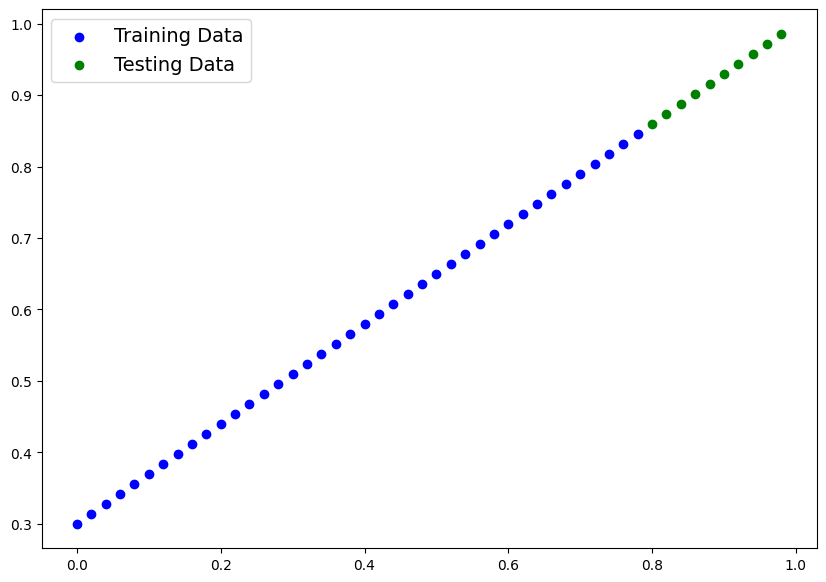

In [122]:
plot_predictions()

## 2. Building a model

Our first PyTorch model!

What our model does:

- Start with random values (weight and bias)
- Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias we used to create the  data)

How does it do so?

Through two main algorithms:
1. Gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [123]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):  # <- almost everything in PyTorch inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,  # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True,  # <- requires_grad = "can this parameter be updated via gradient descent?"
                                            dtype=torch.float))  # <- PyTorch loves the datatype torch.float32

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" is the input data
        return self.weights * x + self.bias  # this is the linear regression formula

### PyTorch model building essentials

- `torch.nn` - Contrains all of the buildings for computational graphs (lke neural network)
- `torch.nn.Parameters` - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
- `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
- `torch.optim` - This is where the optimizers in PyTorch live, they will help in gradient descent
- `def_forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happends in the forward computation

PyTorch Cheat Sheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our pytorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters()

In [124]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [125]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


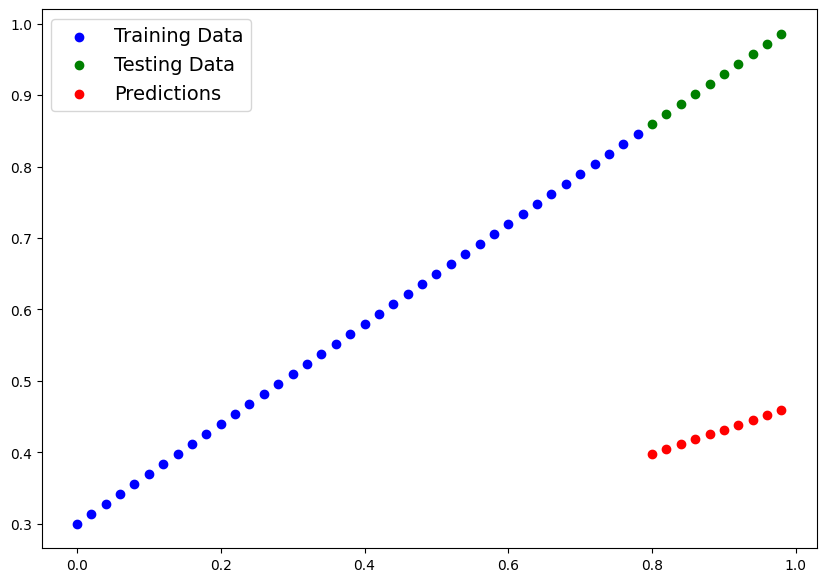

In [126]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, torch.inference_mode is preferred
with torch.no_grad():
    y_preds = model_0(X_test)

print(y_preds)

plot_predictions(predictions=y_preds)

See more on inference mode here - https://x.com/PyTorch/status/1437838231505096708?lang=en

## 3. Training the model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

- Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Things we need to train:

- **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs. Lower is better. https://pytorch.org/docs/stable/nn.html

- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case) to improve the loss function.
https://pytorch.org/docs/stable/optim.html
    - Inside the optimizer, you'll often have to set two parameters:
        - `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
        - `lr` (learning rate) = the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters (a small `lr` resulsts in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [127]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [128]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  # lr = learning rate, possibly the most important hyperparameter

**Q:** Which loss function and optimizer should I use?
**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
1. Loop through the data
2. Forward pass (this involves data moving through our model's `forward()` functions) to make predicitons on data - also called **forward propagation**
3. Calculate the loss (compare forward pass predictionsto ground truth labels)
4. Optimize zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propagation**)
6. Opitmizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [129]:
torch.manual_seed(42)

# An epoch is one loop through the data (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values so we can compare future experiments to past experiments
epoch_count = []
train_loss_values = []
test_loss_values = []

print(f"Initial random parameter values: {model_0.state_dict()}")
print(f"Target parameter values (Actual values): weight={weight}, bias={bias}\n")

### Training
# Step 1. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass on train data
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad (gradients accumulate by default)
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()  # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layer)
    with torch.inference_mode():  # turns off gradient tracking and a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().item())
        test_loss_values.append(test_loss.detach().item())

        print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
        print(f"Updated parameter values: {model_0.state_dict()}\n")



Initial random parameter values: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Target parameter values (Actual values): weight=0.7, bias=0.3

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
Updated parameter values: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
Updated parameter values: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
Updated parameter values: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])

Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
Updated parameter values: OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])

Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
Updated parameter values: OrderedDict([('weights', tensor([0.4748])), ('bias',

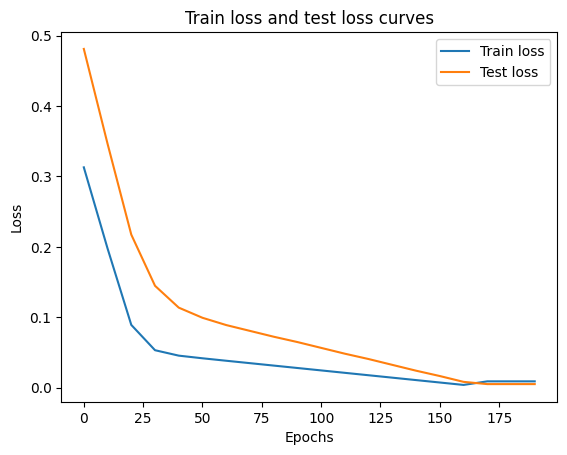

In [130]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Train loss and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

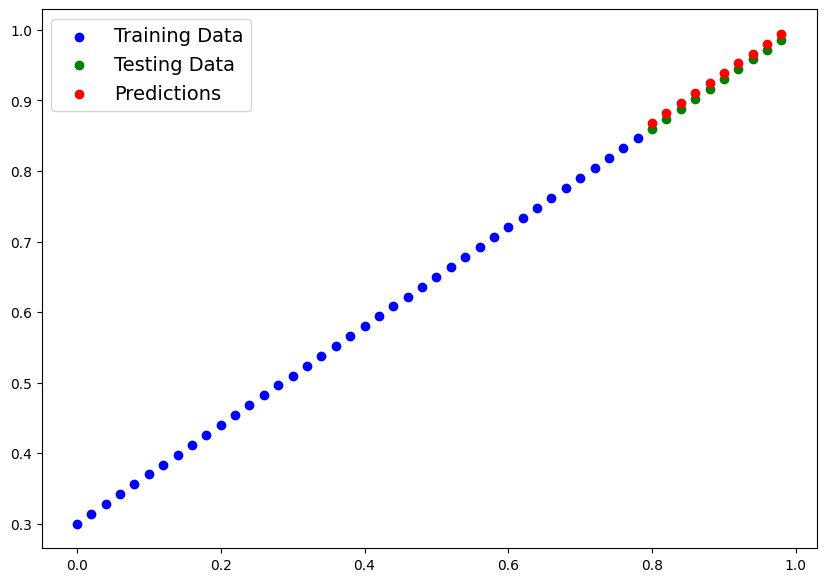

In [131]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

## 4. Saving a model in Pytorch

There ar ethree main methods you should know about for saving sand loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch Save and Load Code Tutorial - https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [132]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create the model's directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to Models/01_pytorch_workflow_model_0.pth


## 5. Loading a PyTorch Model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()`

In [133]:
# To load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters )
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

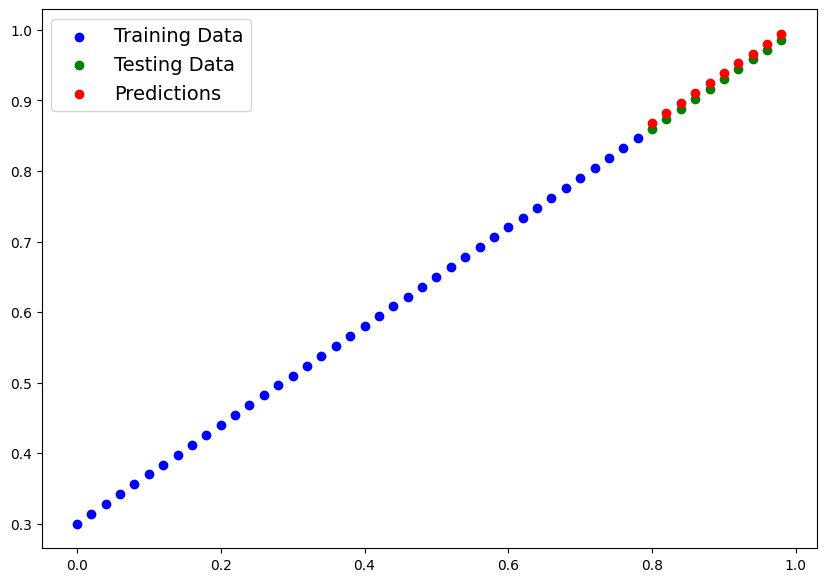

In [134]:
# Make predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

plot_predictions(predictions=loaded_model_preds)

y_preds_new == loaded_model_preds

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [135]:
# Importing libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy

### 1. Data (preparing and loading)

In [136]:
# Preparing the Data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end ,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [137]:
# Splitting the data
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### 2. Building a model

In [138]:
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [139]:
torch.manual_seed(42)
model_1 = LinearRegressionModel2()
model_1.state_dict()

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

model_1.to(device)
next(model_1.parameters()).device
X_train.to(device)
y_train.to(device)
X_test.to(device)
X_test.to(device)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

### 3. Training the model

In [140]:
epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

loss_fn_2 = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn_2(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn_2(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().item())
        test_loss_values.append(test_loss.detach().item())
        print(f"Epoch: {epoch} | Train loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Train loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Train loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Train loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Train loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Train loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Train loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Train loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test Loss: 0.01380180753

In [141]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

[]

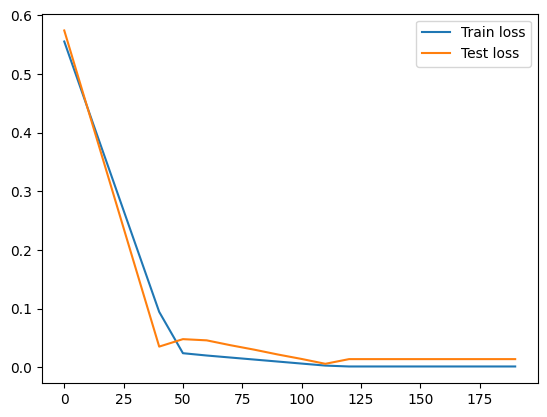

In [142]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.legend()
plt.plot()

### 4. Creating Predictions with the Test Set

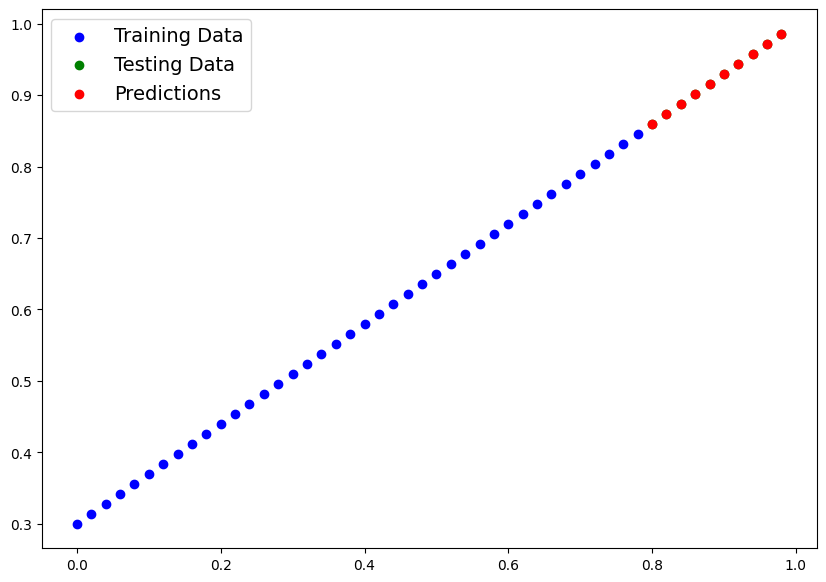

In [143]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

### 5. Saving and loading the model

In [144]:
# Saving
from pathlib import Path

PATH = Path("Models")
PATH.mkdir(parents=True, exist_ok=True)

FILE_NAME = "01-pytorch-workflow-model.pth"
SAVE_PATH = PATH / FILE_NAME
torch.save(model_1.state_dict(), SAVE_PATH)

In [145]:
# Loading
new_model = LinearRegressionModel2()

new_model.load_state_dict(torch.load(SAVE_PATH))

new_model.state_dict()

new_model.to(device)

LinearRegressionModel2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

### 6. Prediction with the new model

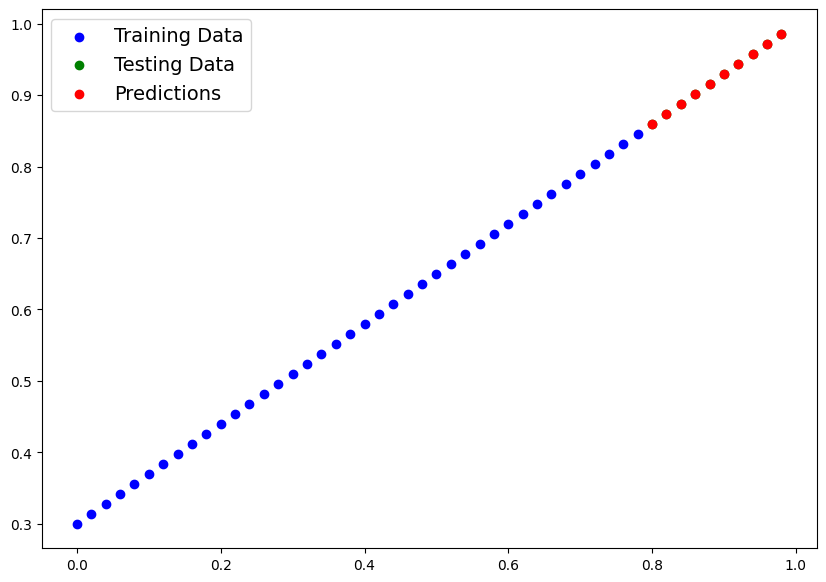

In [146]:
new_model.eval()
with torch.inference_mode():
    y_preds_new = new_model(X_test)

plot_predictions(predictions=y_preds_new)